<a href="https://colab.research.google.com/github/nhula01/polymath/blob/main/Project_421.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction**

Cancer is considered as the most dangerous disease that poses tremendous health risk on humans. Years of research have been working on finding the cures against this dangerous illness. In particular, breast cancer falls under this umbrella for its lethal impact especially for females with the tendency of getting breast cancer 100 times more than males [2]. From the graph, the number of cases increases polynomially as their age increases. Therefore, many research programs on breast cancer could benefit humanity greatly. The causes of breast cancers may come from many reasons. Some noted causes are from genetics, smoking, radian exposure,
previous cancer, etc. Notably, approximately 5% to 10% of breast cancer has been linked to hereditary factors [4]. The most recent data suggests the median of white females getting breast cancer are at the age of 63 while black females are 3 percent less at the age of 60. Coincidently, black males are also getting breast cancer in average at a younger age compared to white males [6]. Furthermore,
breast cells could mutate differently which could lead directly to different types of breast cancers. The most common cancer type in the US is the invasive ductal carcinoma (IDC) which starts directly from the milk ducts [1]. Different mutations lead to different rates of spread and sizes of tumors.


Currently, common ways to detect cancer cells need to involve a lot of money expenses and expert advice. With the advance of technology, we have developed several ways to detect breast cancers such as ultrasound, magnetic resonance imaging, X-ray, etc. It is extremely beneficial to the medical field to be able to detect cancerous cells from early signs without exhausting a lot of resourses. In this study, I will study the utilization of a technique called Fine Needle Aspirate (FNA) to take a dataset of a breast mass. This technique is to inject a needle with minimal impact on the body to collect the tissues at a certain part of our body. Some features could be learned from the sample tissues such as radius,
texture, smoothness, compactness, etc [10].


With the knowledge of the studied features as well as machine learning algorithms, I could be able to detect whether the collected tissues are benign or malignant. After handling the data, I plan out a way to predict breast cancer from the given features using the method called Logistic Regression. In addition, I use Linear Regression
to predict certain features that I could be interested in. Lastly, I also want to study the sensitivity and specificity of the fine needle aspiration to check if they match the hypothesis from a research paper [10].

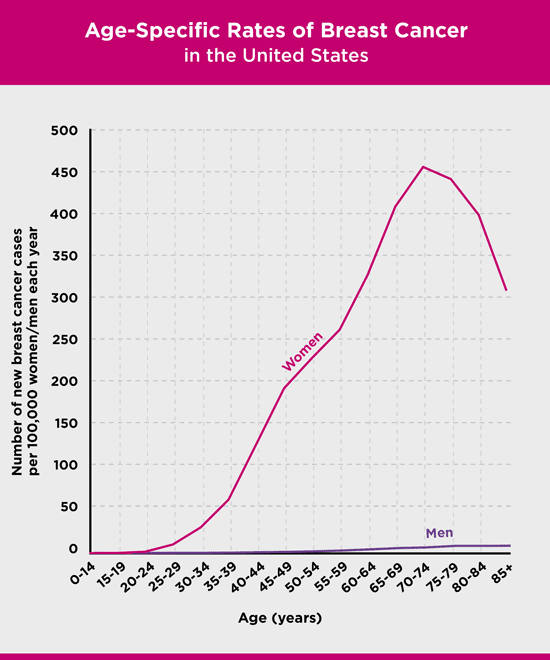

Figure 1: Age vs Number of Cases [6]

* The data that I analyzed is called "Breast Cancer Wisconsin" with  33 columns and 596 rows.

* My code is adapted from "Breast Cancer 5 Different Models" [9].

**THEORY**


The two models that I train in this project are the Logistic Regression and Linear Regression. The dataset that I utilize is cited here [3]. There are ten given features of the cells to study and each of them branches to three different weighted features of mean, standard error, and worst. In total, we have 30 features to work with. However, some features might not
be good predictions of breast cancer. In the process of working, I likely remove several features to enhance the performance with the use of SelectKBest [5]. After choosing good features for high prediction performance, I split the data into 80 percent for training. Leaving 20 percent of the data blind to the training to check how well the models work. In addition, I check the best splitting ratio for the highest performance of my model.

1) Clean the data

Some data are not relevant for the purpose of training. Therefore, some features might need to be removed at the beginning. During this process, I also use SelectKBest to choose the best three features to train the data. I also compare the three features model with the original thirty feature model.

2) Logistic Model

From the handled data, I use the logistic model to predict whether the collected tube of cells is benign or malignant with the chosen features. The mathematical model is related to the sigmoid function where:

$h_{\theta}(x) = g(\theta^T x) = \frac{1}{1 + e^{-\theta^T x}}$

By defining the likelihood of the parameters as:

$\mathcal{L}(\theta) = \sum_{i=1}^{m} y^{(i)} \log h(x^{(i)}) + (1 - y^{(i)}) \log(1 - h(x^{(i)}))$

Using the training data, I want to find a set of θ to maximize the likelihood defined above. This could be achieved via the stochastic gradient ascent rule:

$\theta_j := \theta_j + \alpha \left( y^{(i)} - h_{\theta}(x^{(i)}) \right) x_j^{(i)}$

As a result, I could obtain the logistic model by looping through the stochastic gradient ascent until a set of parameters θ is found to maximize the likelihood. For more details on the mathemmatical framework, I was consulting the lectures by Andrew Ng [8].

3) Linear Regression

After cleaning the data, I look at the heatmap to observe the correlations between the features [5]. For good correlations observed, I train several Linear Regression models to predict certain interested features. For example, I can train the Linear Rgression model of radius mean and area mean to
predict the value of the area mean given only the radius mean. As a result, I might be able to approximate some values when presumably the information were somehow lost during the process. The mathematical model involves in trying choosing the set of parameters $θ_i$ so that the cost
function J(θ) is minimized defined as follows:

$J(\theta) = \frac{1}{2} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})^2$

$h(x) = \sum_{i=0}^{n} \theta_i x_i = \theta^T x$

The minimization could be obtained by taking the gradient with a good step size $\alpha$

$\theta_j := \theta_j + \alpha (y^{(i)} - h_{\theta}(x^{(i)})) x_j^{(i)}$ (1)

From the mathematical model, I could train Linear Regression models by running (1) until the
cost function is minimized. In another word, the set of parameters θ helped ∇J reaching the
lowest point were obtained.


4) Comparison

After predicting the outcome of the disease whether it is benign or malignant, I want to calculate the sensitivity and specificity of the needle that was used to collect the data. Then, I use the information from BMC Cancer on the sensitivity and specificity of diagnostic needles to make my hypothesis [10]. As a result, I could test whether the data supports the hypothesis.

**IMPLEMENTATION**

I will study the problem with Python.

**DATA HANDLING**

Firstly, I import necessary libraries such as numpy, pandas, sklearn, etc. These are important to utilize later on.

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
import statsmodels.api as sma
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
import numpy as np
from sympy import *

Then,  I read the data of breast cancer using read_csv function from the imported library pandas given in [3]. After that, I take a quick look at how the dataframe is structured.

In [ ]:
df = pd.read_csv('/home/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Now the data is ready. But, I want to look at how the mean and other statistic numbers look like for a better understanding of the data. In addition, looking at how many terms I get to train is also important to see how strong my models could be trained.

In [ ]:
print(df.describe())
print(df.shape)

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

We have about 569 rows. This amount of data could be used to train a solid model.

Null values are not necessary and needed for the models to train. As a result, I need to check if there is any null value that exists to remove it from the data.

In [ ]:
# Check if there is any null values
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

The data shows that no null terms appear which is a good sign. However, I notice some columns are not needed to train such as the "unnamed" and "id" column. Removing these two columns further enhances the cleanness in the dataset.

In [ ]:
# Drop the Unnamed column
df.drop(['Unnamed: 32','id'],axis=1,inplace=True)

The ultimate goal of the models is to check whether the tube of tumor is benign or malignant. So, I store the diagnosis column into the output Y variable and then drop this column to get the input data X.

In [ ]:
# Y would be the output while X is the multivariable input
Y = df['diagnosis']
X = df.drop(['diagnosis'],axis=1)

I want to check how the results are stored in the diagnosis column. And, I count the number of results as well as the plot to visualize the data.

In [ ]:
Y.unique()

array(['M', 'B'], dtype=object)

In [ ]:
Y.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

<Axes: xlabel='diagnosis', ylabel='Count'>

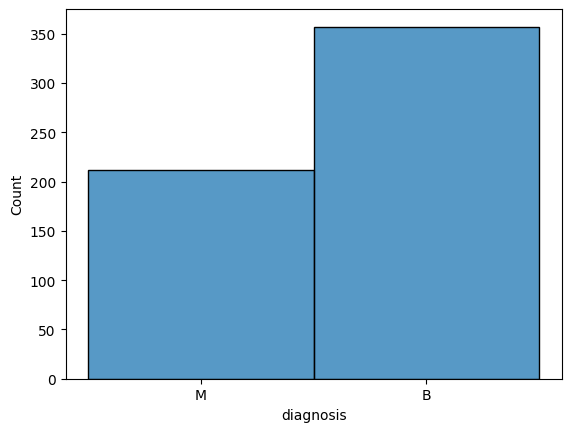

In [ ]:
sns.histplot(Y)

I am left with the 30 key features to study their effects on predicting the diagnosis.

In [ ]:
X.shape

(569, 30)

For my linear regression model later on, I want to observe strong correlations between the features.

<Axes: >

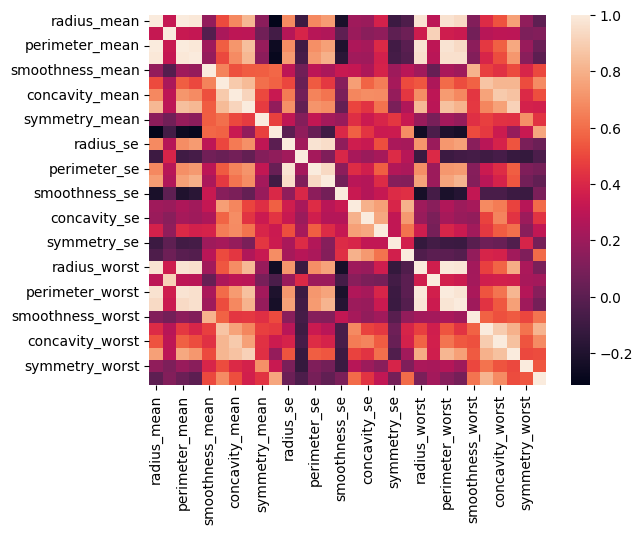

In [ ]:
sns.heatmap(X.corr())

I see high correlation between certain parameters, therefore I could choose a seleted few pairs to train. I want to look through correlations between features that have strength above .98. Later on, I choose the first three pairs to apply the linear regression model.

In [ ]:
highly_corr = []
def high_corr(data,threshold):
    for i in range(len(data.corr().columns)):
        for j in range(i):
            if abs(data.corr().iloc[i,j]) > threshold:
                print(f'({data.corr().columns[i]},{data.corr().columns[j]}) : {data.corr().iloc[i,j]}')
                highly_corr.append((data.corr().columns[i],data.corr().columns[j]))
high_corr(X,0.98)

(perimeter_mean,radius_mean) : 0.9978552814938109
(area_mean,radius_mean) : 0.9873571700566127
(area_mean,perimeter_mean) : 0.9865068039913907
(perimeter_worst,radius_worst) : 0.993707916102949
(area_worst,radius_worst) : 0.9840145644590742


Using the test score method chi2, I use selectKBest to choose the top 3 features that might be the best to train my logistic model. In general, for multivariable model, if the input has many features, the training process might be long and costly. That is why sometimes the best way is to choose a few certain features out of the input to train and not everything.  

[2.66104917e+02 9.38975081e+01 2.01110286e+03 5.39916559e+04
 1.49899264e-01 5.40307549e+00 1.97123536e+01 1.05440354e+01
 2.57379775e-01 7.43065536e-05 3.46752472e+01 9.79353970e-03
 2.50571896e+02 8.75850471e+03 3.26620664e-03 6.13785332e-01
 1.04471761e+00 3.05231563e-01 8.03633831e-05 6.37136566e-03
 4.91689157e+02 1.74449400e+02 3.66503542e+03 1.12598432e+05
 3.97365694e-01 1.93149220e+01 3.95169151e+01 1.34854195e+01
 1.29886140e+00 2.31522407e-01]


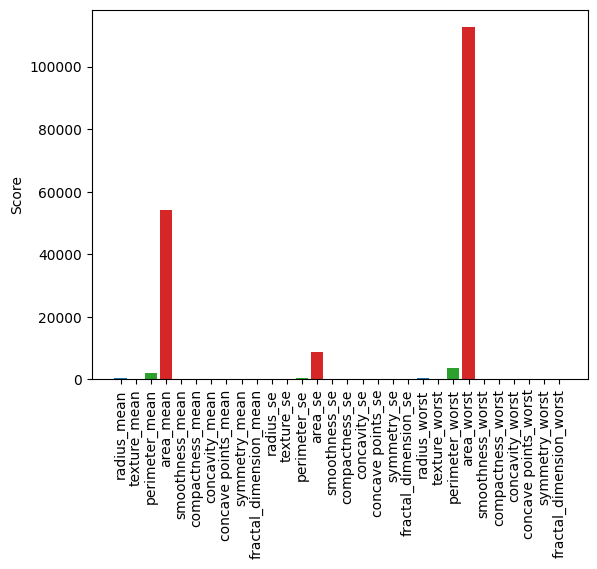

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 #Score method

selector = SelectKBest(score_func=chi2, k=3) # select top 3 features
selector.fit(X,Y)
print(selector.scores_)
for i,j in enumerate(selector.scores_):
    plt.bar(i,j)
plt.xticks(range(len(X.columns)),X.columns,rotation=90)
plt.ylabel("Score")
plt.show()

In this case, I only utilize 3 attributes out of the thirty based on the evaluations of chi2 to train the model. However, I also want to train the data with 30 attributes to compare the effectiveness between two models

In [ ]:
X_selected = selector.transform(X)
print(X_selected.shape)
print(X.shape)

(569, 3)
(569, 30)



**Logistic regression**

After preparing my input and output, it is important to split the data into the training set and the testing set. I want a part of my data to be blind to the trained model such that bias could be reduced as well.

In [ ]:
from sklearn.model_selection import train_test_split

# Split 80-20 (30 features)
X_train,X_test,Y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
# Splote 80-20 (3 features)
X_selected_train,X_selected_test,Y_selected_train,y_selected_test = train_test_split(X_selected,Y,test_size=0.2,random_state=42)

print(X_train.shape, Y_train.shape)

(455, 30) (455,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,ConfusionMatrixDisplay

# Model of 30 features being trained
model = LogisticRegression().fit(X_train,Y_train)
model_selected = LogisticRegression().fit(X_selected_train, Y_selected_train)
# Model of 3 features being trained
model_prediction = model.predict(X_test)
model_selected_prediction = model_selected.predict(X_selected_test)

print(f'Selected Model Accuracy: {accuracy_score(y_selected_test, model_selected_prediction)}')
print(f'Normal Model Accuracy: {accuracy_score(y_test, model_prediction)}')

Selected Model Accuracy: 0.9736842105263158
Normal Model Accuracy: 0.9649122807017544


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


It turns out counterintuitively that the model with less features return a more accurate answer than the one with 30 features. Reasons to this result are because other features are not actually good features to predict the outcome of the result. Here is the preview of the two models:

Results of model with no selectedKBEST
              precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Results of model with selectedKBEST
              precision    recall  f1-score   support

           B       0.96      1.00      0.98        71
           M       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



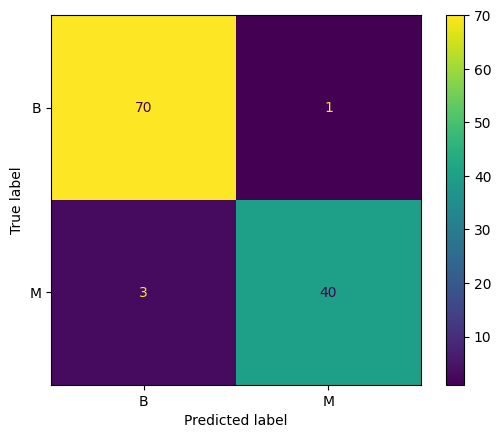

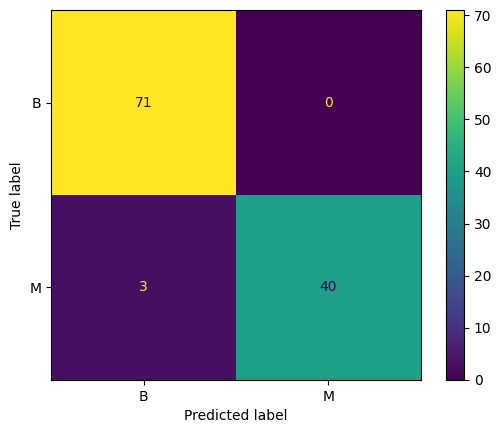

In [ ]:
print("Results of model with no selectedKBEST")
print(classification_report(y_test,model_prediction))
cm1 = confusion_matrix(y_test,model_prediction)
ConfusionMatrixDisplay(cm1,display_labels=['B','M']).plot()

print("Results of model with selectedKBEST")
print(classification_report(y_selected_test,model_selected_prediction))
cm2 = confusion_matrix(y_selected_test,model_selected_prediction)
ConfusionMatrixDisplay(cm2,display_labels=['B','M']).plot()

One more interesting questions is what should be a good split. Whether it is 80-20 or something. I want to detect this result for the data.

Text(0, 0.5, 'Score Accuracy')

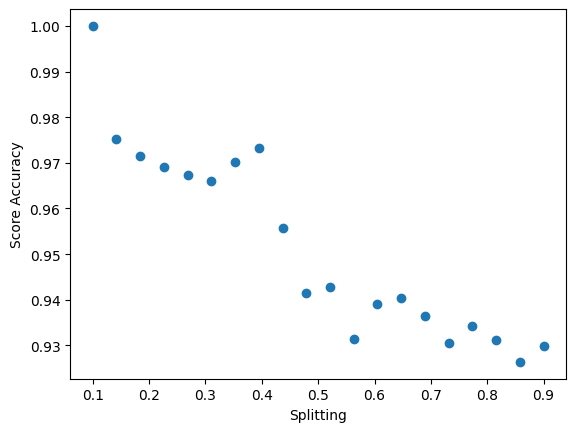

In [ ]:
# Try multipl split
size = np.linspace(0.1,.9,20)
size_list = []
score_list = []
for i in size:
  X_train,X_test,Y_train,y_test = train_test_split(X_selected,Y,test_size=i,random_state=42)
  model = LogisticRegression().fit(X_train,Y_train)
  model_prediction = model.predict(X_test)
  size_list.append(i)
  score_list.append(accuracy_score(y_test, model_prediction))

plt.scatter(size_list,score_list)
plt.xlabel("Splitting")
plt.ylabel("Score Accuracy")

It turns out the best way for me to do is to split 90-10 in this dataset.

**Linear Regression**

Linear regression is a common method in machine learning. This technique helps predicting the outcomes of result that have a linear trend.

In [ ]:
# extract three attributes for training
# I also need to reshape them because they are not in a right dimensional array to be trained
perimeter_mean, radius_mean, area_mean = (np.array(df["perimeter_mean"]).reshape(-1,1),np.array(df["radius_mean"]).reshape(-1,1), np.array(df["area_mean"]).reshape(-1,1))

# Import the right model: linear regression in this case
from sklearn.linear_model import LinearRegression

# Then I train three models between parimeter_mea, area_mean, and radius_mean
model1 = LinearRegression().fit(perimeter_mean, radius_mean)
model2 = LinearRegression().fit(area_mean, radius_mean)
model3 = LinearRegression().fit(area_mean, perimeter_mean)

And, I also want to find the score of each of these models

In [ ]:
print(model1.score(perimeter_mean, radius_mean))
print(model2.score(area_mean, radius_mean))
print(model3.score(area_mean, perimeter_mean))

0.9957151628050925
0.9748741812622022
0.9731956743213074


I then can graph them. Information of the statistics of pd.describe() comes in handy to determine a good range to apply linspace.

In [ ]:
print(df["perimeter_mean"].describe())
print(df["area_mean"].describe())
print(df["radius_mean"].describe())

count    569.000000
mean      91.969033
std       24.298981
min       43.790000
25%       75.170000
50%       86.240000
75%      104.100000
max      188.500000
Name: perimeter_mean, dtype: float64
count     569.000000
mean      654.889104
std       351.914129
min       143.500000
25%       420.300000
50%       551.100000
75%       782.700000
max      2501.000000
Name: area_mean, dtype: float64
count    569.000000
mean      14.127292
std        3.524049
min        6.981000
25%       11.700000
50%       13.370000
75%       15.780000
max       28.110000
Name: radius_mean, dtype: float64


In [ ]:
x1 = np.linspace(30,200)
x2 = np.linspace(0,2500)
x3 = np.linspace(0,2500)
y1 = (model1.intercept_ + x1 * model1.coef_ )
y2 = (model2.intercept_ + x2 * model2.coef_ )
y3 = (model3.intercept_ + x3 * model3.coef_ )

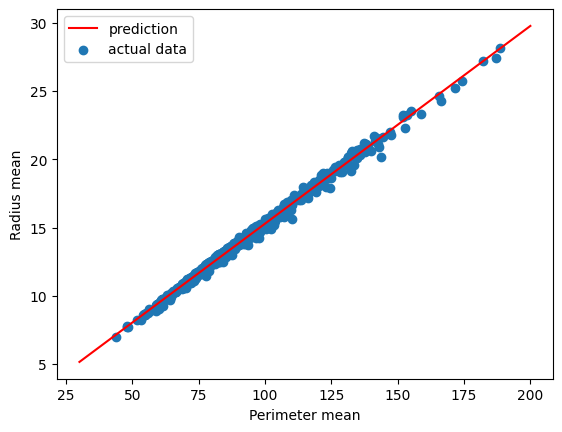

In [ ]:
#plot perimeter vs radius
plt.plot(x1,y1.reshape(-1), 'r',label="prediction")
plt.scatter(perimeter_mean, radius_mean,label="actual data")
plt.xlabel("Perimeter mean")
plt.ylabel("Radius mean")
plt.legend()

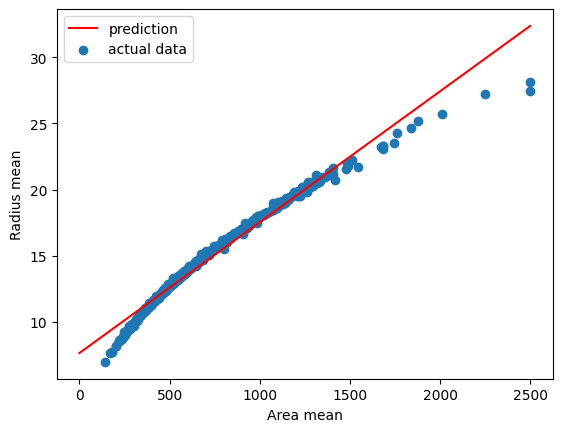

In [ ]:
#plot area vs radius
plt.plot(x2,y2.reshape(-1), 'r', label="prediction")
plt.scatter(area_mean, radius_mean, label="actual data")
plt.xlabel("Area mean")
plt.ylabel("Radius mean")
plt.legend()

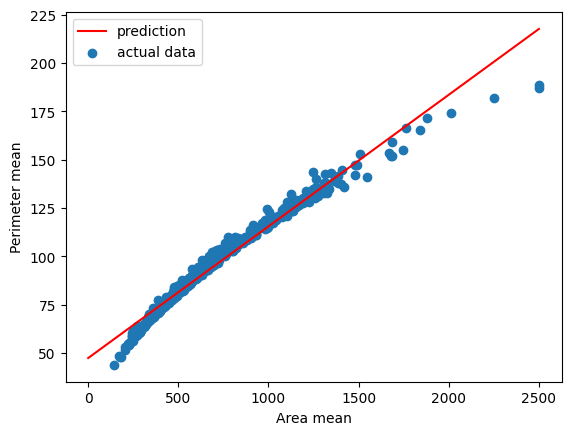

In [ ]:
#plot area vs perimeter
plt.plot(x3,y3.reshape(-1), 'r', label="prediction")
plt.scatter(area_mean, perimeter_mean, label="actual data")
plt.xlabel("Area mean")
plt.ylabel("Perimeter mean")
plt.legend()

My Linear Regression models work well within a certain range to predict other features. According to my models, the prediction on radius and perimeter leads to a very high score.

**Hypothesis Testing**


Next, I use the predictions from my Logistic Regression model to find the sensitivity and specificity of the dataset to test the hypothesis of the paper [10]. In this paper, I see the hypothesis as:


Sensitivity, 0.927 (95% confidence interval [CI], 0.921 to 0.933)

Specificity, 0.948 (95% CI, 0.943 to 0.952)

If one of my results is out of the 95% confidence interval, I reject the hypothesis.

In [ ]:
# now we check the number that
tp = cm2[0][0]
fp = cm2[0][1]
fn = cm2[1][0]
tn = cm2[1][1]
print('True positive = ', cm2[0][0])
print('False positive = ', cm2[0][1])
print('False negative = ', cm2[1][0])
print('True negative = ', cm2[1][1])
#sensitivity
sensitivity = tp/(tp+fn)
#specificity
specificity = tn/(tn+fp)
print('Sensitivity = ', sensitivity)
print('Specificity = ', specificity)

True positive =  71
False positive =  0
False negative =  3
True negative =  40
Sensitivity =  0.9594594594594594
Specificity =  1.0


Both the sensitivity and specificity do not fall in the 95% confidence interval. Therefore, I reject the hypothesis.

**Conclusion**

The Fine Needle Aspirations method is a very good and efficient way to detect breast cancers more than conventional ways. There are many prospects to cause breast cancers. However, I only look at the study of 3 seletecd features and they turn out the method works very well in detecting the cancerous tubes. This could also mean that some features are not that well at predicting the cancerous cells. The Linear Regression models work well for certain ranges to predict other features. At last, I test the hypothesis statement and it turns out the data does not support it.

Here are a few things that I have achieved in this paper:
- A Logistic Regression model to predict whether a tube of tumor is benign or malignant
- Linear Regression models to predict other features given area_mean, perimeter_mean, and radius_mean.
- The data does not support the given hypothesis: sensitivity, 0.927 (95% confidence interval [CI], 0.921 to 0.933); specificity, 0.948 (95% CI, 0.943 to 0.952).

Overall, there are a lot more to explore and I would like to leave them as my future exploration.

**Works Cited:**

[1] "Breast Cancer," Cleveland Clinic, 2024. Resource: https://my.clevelandclinic.org/health/diseases/3986-breast-cancer

[2] "Breast Cancer Inherited Risk," Fox Chase Cancer Center, 2024. Resource: https://www.foxchase.org/cancer-care-services/prevention-screening/risk-assessment/inherited-cancer/breast-cancer-inherited

[3] "Breast Cancer Wisconsin (Diagnostic) Data Set," Kaggle, 2024. Resource: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data/data

[4] "Key Statistics for Breast Cancer," American Cancer Society, 2024. Resource: https://www.cancer.org/cancer/types/breast-cancer/about/how-common-is-breast-cancer.html#:~:text=younger%20than%2045.-,Lifetime%20chance%20of%20getting%20breast%20cancer,her%20life%20is%20about%2013%25

[5] "Optimizing Performance: SelectKBest for Efficient Feature Selection in Machine Learning," Medium, 2024.
Resource: https://medium.com/@Kavya2099/optimizing-performance-selectkbest-for-efficient-feature-selection-in-machine-learning-3b635905ed48

[6] "The Who, What, Where, When and Sometimes, Why," Susan G. Komen, 2024. Resource: https://www.komen.org/breast-cancer/risk-factor/age/

[7] Alan Marcus, Navneet Narula, Mohamed K. Kamel, June Koizumi, Jeffrey L. Port, Brendon
Stiles, Andre Moreira, Nasser Khaled Altorki, and Tamara Giorgadze. Sensitivity and specificity
of fine needle aspiration for the diagnosis of mediastinal lesions. Annals of Diagnostic Pathology,
39:69–73, 2019.

[8] "Cs229 Lecture Notes," Andrew Ng, 2024. Resource: https://sgfin.github.io/files/notes/CS229_Lecture_Notes.pdf

[9] "Breast Cancer 5 Different Models," Kaggle, 2024. Resource: https://www.kaggle.com/code/mennatallah77/breast-cancer-5-different-models#%F0%9F%8C%A0Logistic-Regression%F0%9F%8C%A0

[10] Yu, YH., Wei, W. & Liu, JL. Diagnostic value of fine-needle aspiration biopsy for breast mass: a systematic review and meta-analysis. BMC Cancer 12, 41 (2012). https://doi.org/10.1186/1471-2407-12-41